# WORLD DEVELOPMENT

In [356]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 

In [357]:
datos = pd.read_csv('Indicators.csv')
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [358]:
n_paises = datos['CountryName'].unique().tolist() #nº países en total, se pasa de array a lista
len(n_paises)

247

In [359]:
years = datos['Year'].unique().tolist()
print("rango temporal de los datos: ", min(years), max(years))

rango temporal de los datos:  1960 2015


## Fertilidad

Text(0.5, 0, '# de país')

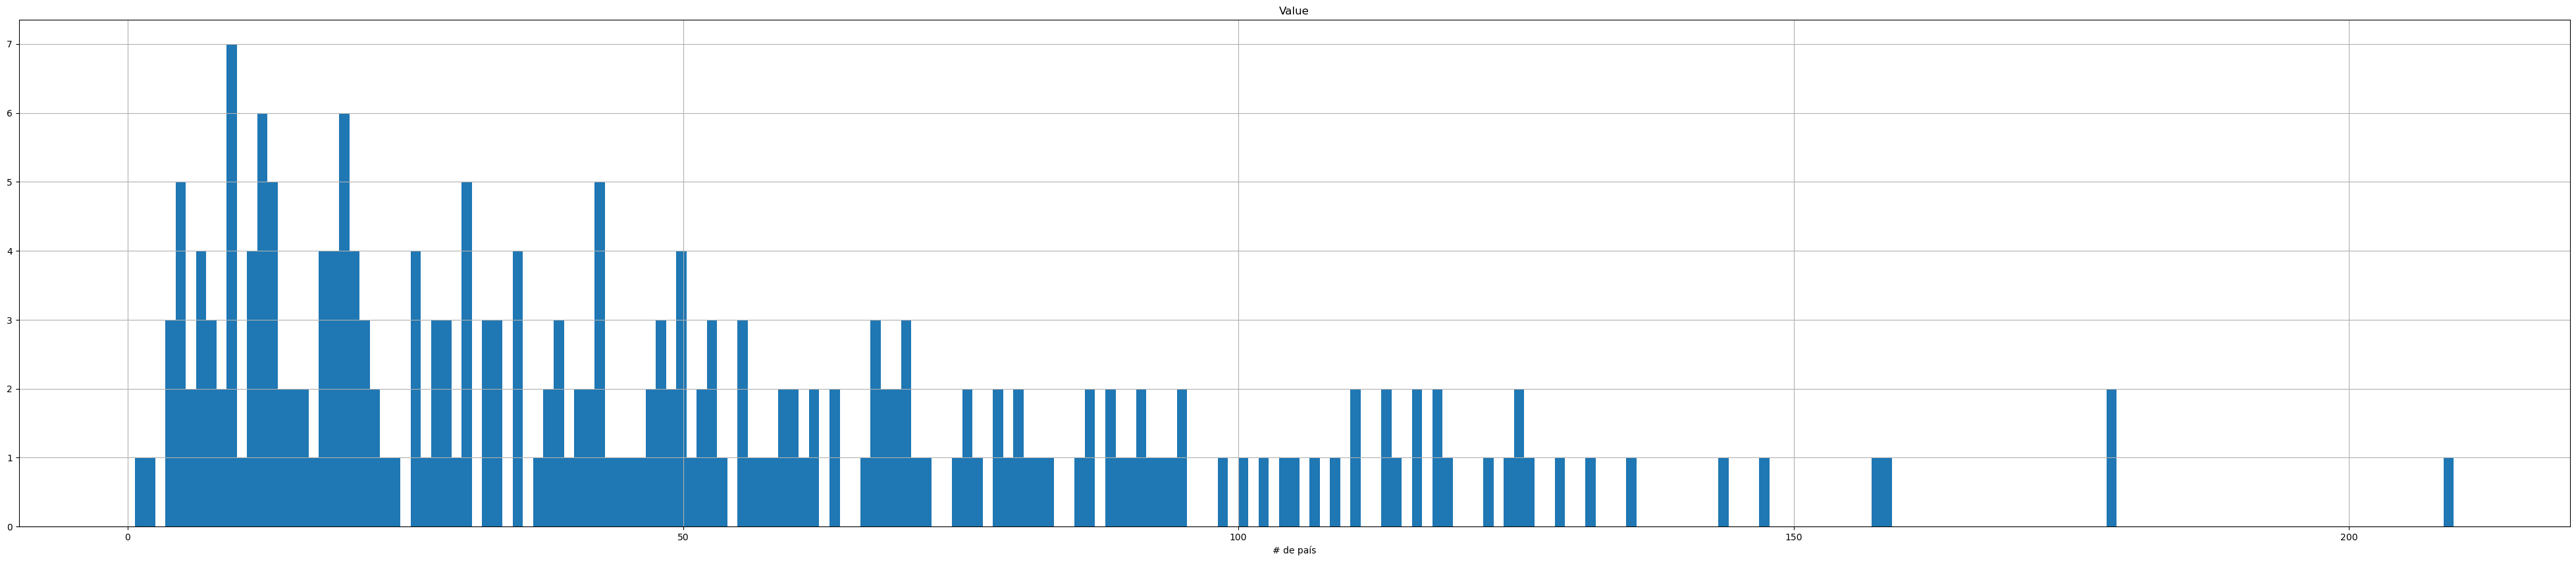

In [360]:
filtro_fertility = datos['IndicatorCode'] == 'SP.ADO.TFRT' #se crea filtro (dataset booleano)
datos_fertility_paises = datos[filtro_fertility & (datos['Year'] == 2011)] #se obtienen los indicadores de fertilidad de todos los países
datos_fertility_paises.hist(bins=227, column='Value', figsize=(50,10))
plt.xlabel('# de país')

## Fertilidad ESP

In [361]:
filtro_spain = datos['CountryName'] == 'Spain' #se crea filtro (dataset booleano)
datos[filtro_spain].head() #se obtienen los indicadores de España

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19522,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,10.056400
19523,Spain,ESP,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,55.132352
19524,Spain,ESP,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,12.695256
19525,Spain,ESP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,42.437095
19526,Spain,ESP,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,8.314033


In [362]:
datos_fertility_spain = datos[filtro_spain & filtro_fertility] #se obtienen los indicadores de España y de fertilidad
datos_fertility_spain.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19522,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,10.0564
45611,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,10.3502
73802,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,10.6440
102392,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,11.0234
131421,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,11.4028


Text(0.5, 1.0, 'Indices de fertilidad')

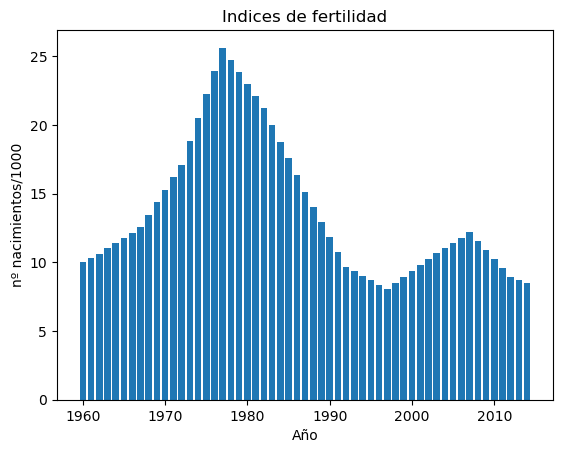

In [363]:
plt.bar(datos_fertility_spain['Year'], datos_fertility_spain['Value']) #gráfico de barras con los valores respecto a cada año
plt.xlabel('Año')
plt.ylabel('nº nacimientos/1000')
plt.title('Indices de fertilidad')

Text(0.5, 1.0, 'Indices de fertilidad')

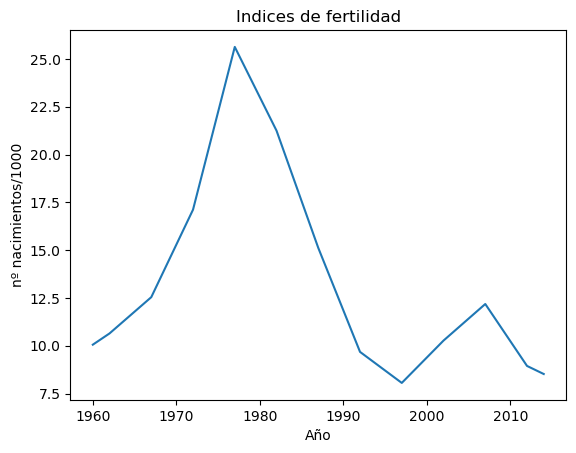

In [364]:
plt.plot(datos_fertility_spain['Year'], datos_fertility_spain['Value']) #gráfico de líneas
plt.xlabel('Año')
plt.ylabel('nº nacimientos/1000')
plt.title('Indices de fertilidad')

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

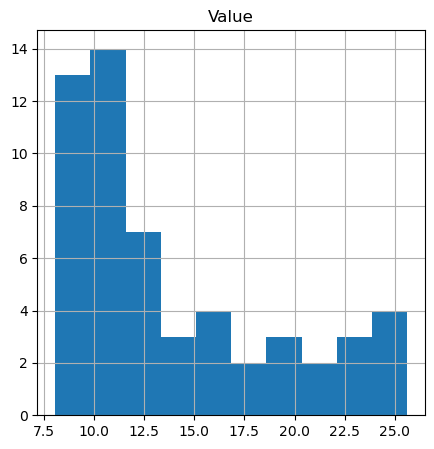

In [365]:
datos_fertility_spain.hist(bins=10, column='Value', figsize=(5,5)) #histograma (tabla de frecuencias) con 10 barras para la columna Value
#mayor frecuencia en los valores mínimos (más años con valores pequeños)

## PIB vs CO2 ESP

In [366]:
filtro_co2 = datos['IndicatorCode'] == 'EN.ATM.CO2E.KT' #se crea filtro (dataset booleano)
filtro_pib = datos['IndicatorCode'] == 'NY.GDP.PCAP.CD' #se crea filtro (dataset booleano)
datos_co2_spain = datos[filtro_spain & filtro_co2] #se obtienen los indicadores de CO2 de España 
datos_pib_spain = datos[filtro_spain & filtro_pib] #se obtienen los indicadores de PIB de España
print("", len(datos_co2_spain), len(datos_pib_spain)) #se comprueba la cantidad de datos de cada uno y si están en el mismo rango de años

 52 55


In [367]:
filtro_años = datos_pib_spain['Year'] < 2012 #como existen hasta 2011 en el caso de CO2, se reducen los datos del PIB
datos_pib_spain = datos_pib_spain[filtro_años]
print("", len(datos_co2_spain), len(datos_pib_spain)) #se vuelve a comprobar la cantidad de datos de cada uno 

 52 52


Text(0.5, 1.0, 'CO2 vs PIB (Spain)')

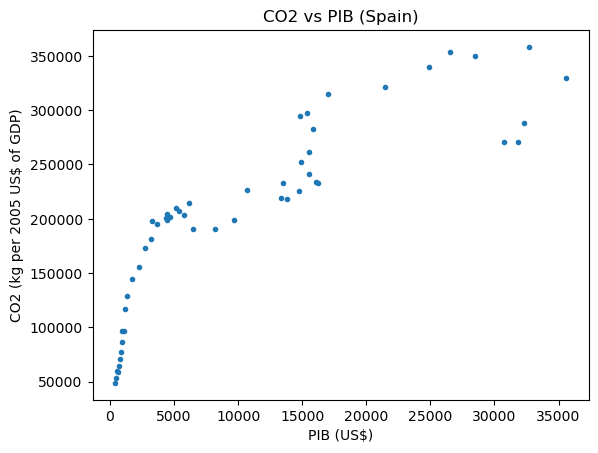

In [368]:
plt.plot(datos_pib_spain['Value'],datos_co2_spain['Value'],'.') #gráfico de puntos
plt.xlabel('PIB (US$)')
plt.ylabel('CO2')
plt.title('CO2 vs PIB (Spain)')

In [369]:
np.corrcoef(datos_pib_spain['Value'],datos_co2_spain['Value']) #se calcula la correlación entre los valores, hay mucha correlación (0.85)

array([[1.        , 0.85648992],
       [0.85648992, 1.        ]])